In [1]:
import math
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
def anova(Y):
    Yt_bar=[]
    for Yt in Y:
        Yt_bar.append(np.mean(Yt))
    y_bar=np.mean(Yt_bar)
    ST=0
    vT=len(Y)-1
    for t in range(len(Y)):
        ST+=(len(Y[t])*((Yt_bar[t]-y_bar)**2))
    SD=0
    vD=-1
    for t in range(len(Y)):
        for i in range(len(Y[t])):
            SD+=(Y[t][i]-y_bar)**2
        vD+=len(Y[t])
    SR=0
    vR=0
    for t in range(len(Y)):
        for i in range(len(Y[t])):
            SR+=(Y[t][i]-Yt_bar[t])**2
        vR+=len(Y[t])-1
    
    if not(round(SD,5)==round(SR,5)+round(ST,5)):
        return ("Error in SOS")
    elif not(vD==vT+vR):
        return ("Error in DOF")
    
    SR2=round(SR/vR,10)
    ST2=round(ST/vT,10)
    SD2=round(SD/vD,10)

    F_ratio=round(ST2/SR2,4)
    data = [["Between Treatments", 'ST = '+str(ST),'vT = '+str(vT) , 'ST2 = '+str(ST2),"ST2/SR2 = "+str(F_ratio)],
            ["Within Treatments", 'SR = '+str(SR),'vR = '+str(vR) , 'SR2 = '+str(SR2),None],
            ["Total about Grand Average", 'SD = '+str(SD),'vD = '+str(vD) , 'SD2 = '+str(SD2),None]]
    print (tabulate(data, headers=["Source of Variation", "Sum of Squares", "Degrees of Freedom", "Mean Square","F-Ratio"]))
    
    n_bar=(vD+1)/(vT+1)
    s=(SR2/n_bar)**0.5
    plt.plot(Yt_bar, np.zeros_like(Yt_bar), 'x',label="Yt_bar")
    sig1=np.arange(np.mean(Yt_bar)-s,np.mean(Yt_bar)+s,0.01)
    sig2=np.arange(np.mean(Yt_bar)-2*s,np.mean(Yt_bar)+2*s,0.01)
    plt.plot(sig1,np.zeros_like(sig1)+0.25,'red',label="1-sigma band")
    plt.plot(sig2,np.zeros_like(sig2)-0.25,'green',label="2-sigma band")
    plt.legend(loc="upper left")
    plt.ylim(-2, 2)
    plt.show()
    Y_res=Y
    Y_all=[]
    figure, axis = plt.subplots(nrows=len(Y_res)+1)
    for i in range(len(Y_res)):
        for j in range(len(Y_res[i])):
            Y_res[i][j]-=Yt_bar[i]
            Y_all.append(Y_res[i][j])
        
        axis[i].scatter(Y_res[i], np.zeros_like(Y_res[i]),alpha=.25,s=100)
        axis[i].set_title("Residual set: "+str(i+1))
        
    axis[len(Y_res)].scatter(Y_all, np.zeros_like(Y_all),alpha=.25,s=100)
    axis[len(Y_res)].set_title("All residuals: ")
    figure.tight_layout()
    plt.show()
    
    for i in range(len(Y_res)):
        plt.plot(np.zeros_like(Y_res[i])+Yt_bar[i], Y_res[i], 'x')
    plt.title("Residuals vs Estimates")
    plt.xlabel("Estimates")
    plt.ylabel("Residuals")
    plt.show()

In [3]:
Y=np.array([[0.1176, 0.1230, 0.1156, 0.1672],
    [0.1279, 0.1000, 0.1136, 0.1176],
    #[0.0954, 0.1079, 0.1204],
    #[0.0699, 0.1114, 0.1114]])


C:\Users\Suman\AppData\Local\Temp\ipykernel_25184\317924868.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[0.1176, 0.1230, 0.1156, 0.1672],


Source of Variation        Sum of Squares              Degrees of Freedom    Mean Square         F-Ratio
-------------------------  --------------------------  --------------------  ------------------  ----------------
Between Treatments         ST = 0.0020880831857638875  vT = 3                ST2 = 0.0006960277  ST2/SR2 = 1.9061
Within Treatments          SR = 0.003651664166666667   vR = 10               SR2 = 0.0003651664
Total about Grand Average  SD = 0.0057397473524305525  vD = 13               SD2 = 0.000441519


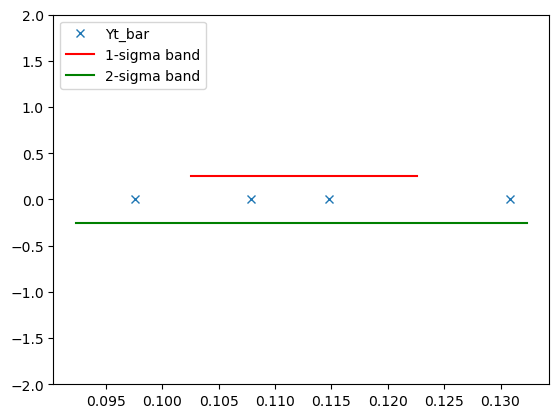

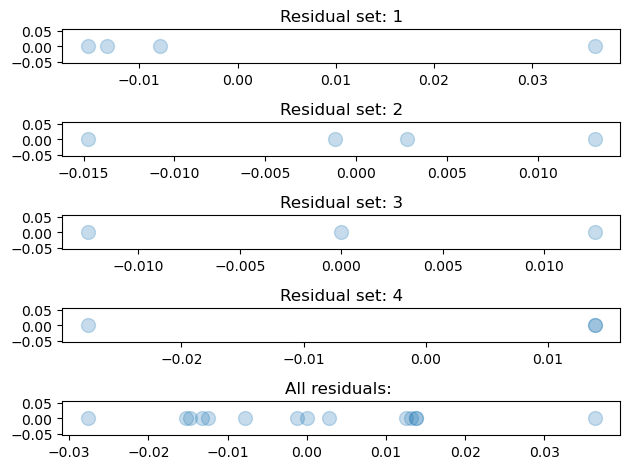

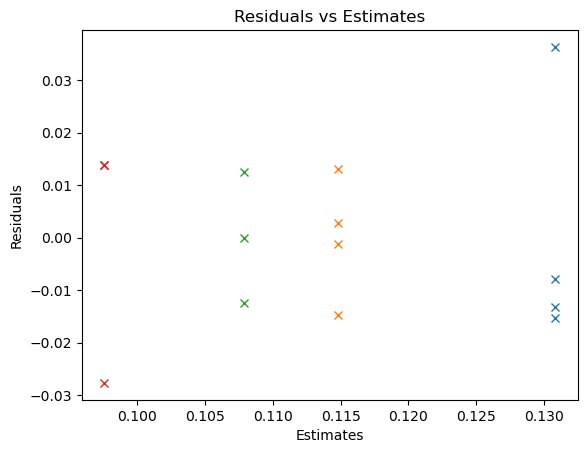

In [4]:
anova(Y)